# Visión Computacional Basada en Redes Neuronales Artificiales
## Grupo XX - Trabajo Práctico Especial

Integrantes del grupo:

* XXXXX
* XXXXX
* ...





### Configuración del ambiente

[Editar el número del grupo en la variable ```datasets_folder```, para que los datos con los que trabajen uds se guarden en el lugar correcto]

In [ ]:
# montamos la unidad de Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

# Imports necesarios
from os import makedirs
from torchvision import datasets, transforms
import torch

# carpeta donde van a guardar los datos
from os import makedirs
datasets_folder = '/content/gdrive/My Drive/Colab Notebooks/Computer Vision/Grupo 04' ## < EDITAR NÚMERO DE GRUPO
makedirs(datasets_folder, exist_ok=True)

# NO TOCAR EL CÓDIGO DE ACÁ ABAJO, ES PARA BAJAR DATOS NUEVOS!
new_datasets_folder = '/content/gdrive/My Drive/Colab Notebooks/Computer Vision/'
makedirs(new_datasets_folder, exist_ok=True)
!rm /content/gdrive/My\ Drive/Colab\ Notebooks/Computer\ Vision/cifar10.1_v4_data.npy*
!rm /content/gdrive/My\ Drive/Colab\ Notebooks/Computer\ Vision/cifar10.1_v4_labels.npy*
!wget --no-check-certificate -P /content/gdrive/My\ Drive/Colab\ Notebooks/Computer\ Vision/ https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_data.npy
!wget --no-check-certificate -P /content/gdrive/My\ Drive/Colab\ Notebooks/Computer\ Vision/ https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_labels.npy
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/Computer\ Vision/

Mounted at /content/gdrive/
--2025-11-15 02:52:10--  https://github.com/modestyachts/CIFAR-10.1/raw/master/datasets/cifar10.1_v4_data.npy
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/modestyachts/CIFAR-10.1/master/datasets/cifar10.1_v4_data.npy [following]
--2025-11-15 02:52:11--  https://raw.githubusercontent.com/modestyachts/CIFAR-10.1/master/datasets/cifar10.1_v4_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6208640 (5.9M) [application/octet-stream]
Saving to: ‘/content/gdrive/My Drive/Colab Notebooks/Computer Vision/cifar10.1_v4_data.npy’

cifar10.1_v4_data.n 100%[=========

### 1. Acceso a los datos

[Les damos rutinas para acceder a los datos de CIFAR10. Tienen que establecer las transformaciones correctas para los datos de entrenamiento y test, editando las variables ```training_transformations``` y ```test_transformations```. Si quieren, pueden incorporar data augmentation (aunque háganlo donde corresponde!). También pueden escribir su propia clase ```Dataset``` si quieren.]

In [ ]:
# Cargamos CIFAR10 sin normalización (solo ToTensor) para calcular estadísticas
temp_transform = transforms.Compose([transforms.ToTensor()])
tensor_cifar10 = datasets.CIFAR10(datasets_folder, train=True, download=True, transform=temp_transform)

# Apilamos todas las imágenes en un tensor gigante
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
print(f"Shape del tensor de imágenes: {imgs.shape}")
print(f"Shape después de view: {imgs.view(3, -1).size()}")

# Calculamos la media de cada canal
mean = imgs.view(3, -1).mean(dim=1)
print(f"Media por canal (R, G, B): {mean}")

# Calculamos la desviación estándar
std = imgs.view(3, -1).std(dim=1)
print(f"Desviación estándar por canal (R, G, B): {std}")

Shape del tensor de imágenes: torch.Size([3, 32, 32, 50000])
Shape después de view: torch.Size([3, 51200000])
Media por canal (R, G, B): tensor([0.4914, 0.4822, 0.4465])
Desviación estándar por canal (R, G, B): tensor([0.2470, 0.2435, 0.2616])


In [ ]:
# Transformaciones para ENTRENAMIENTO: data augmentation + normalización + estandarización
list_of_training_transformations = [
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
]

# Transformaciones para TEST/VALIDACIÓN: solo normalización + estandarización
list_of_test_transformations = [
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
]

# Generamos las transformaciones compuestas
training_transformations = transforms.Compose(list_of_training_transformations)
test_transformations = transforms.Compose(list_of_test_transformations)

# Descargamos/cargamos los datasets finales con todas las transformaciones
cifar10_training = datasets.CIFAR10(datasets_folder, train=True, download=True, transform=training_transformations)
cifar10_validation = datasets.CIFAR10(datasets_folder, train=False, download=True, transform=test_transformations)

print(f"Dataset de entrenamiento: {len(cifar10_training)} imágenes")
print(f"Dataset de validación: {len(cifar10_validation)} imágenes")

Dataset de entrenamiento: 50000 imágenes
Dataset de validación: 10000 imágenes


In [ ]:
# y le pedimos a cifar10 el elemento 99.
data_sample = cifar10_training[99]
print(data_sample)

(tensor([[[-1.0050, -1.1955, -1.2590,  ...,  0.6619,  0.9159,  0.1856],
         [-0.9891, -1.1161, -1.1637,  ...,  0.5984,  0.7254,  0.3126],
         [-1.0685, -0.9732, -1.1002,  ...,  0.4396,  0.3920, -0.0366],
         ...,
         [ 0.7412,  0.2809,  0.0745,  ..., -0.4970,  0.2491,  0.2174],
         [ 0.9159,  0.3920, -0.7192,  ..., -0.7034,  0.1539,  0.2809],
         [ 1.3286,  0.9000,  0.2174,  ..., -1.0526,  0.0745,  0.6936]],

        [[-0.9495, -1.1749, -1.2716,  ...,  0.7900,  0.9833,  0.2102],
         [-0.9333, -1.1266, -1.1749,  ...,  0.7417,  0.8222,  0.3712],
         [-0.9817, -0.9172, -1.0139,  ...,  0.5162,  0.5001,  0.0813],
         ...,
         [ 0.1941, -0.2086, -1.0783,  ..., -0.7723, -0.2408, -0.2891],
         [ 0.3712, -0.0797, -0.9495,  ..., -0.8206, -0.0797,  0.0330],
         [ 0.8222,  0.4518, -0.2247,  ..., -1.1105, -0.0636,  0.5323]],

        [[-1.0474, -1.3172, -1.4222,  ..., -0.6726, -0.5677, -0.6276],
         [-1.1523, -1.3172, -1.3022,  ..., -

In [ ]:
#Verificamos que es un tensor y label
img_t, label = cifar10_training[99]
print(type(img_t))
print(type(label))

<class 'torch.Tensor'>
<class 'int'>


### 2. Implementación de su propia red neuronal convolucional

[Les damos la "cáscara" de la clase que queremos que implementen, con una arquitectura súper pava. La idea es que reemplacen esa arquitectura con su propia arquitectura de red neuronal convolucional, explicando las distintas decisiones que tuvieron en cuenta a la hora de decidir cuántas capas usar, qué profundidad, qué capas usar, etc.]

In [ ]:
del basic_cnn_model
torch.cuda.empty_cache()

In [ ]:
#PROFE
import torch.nn as nn
import torch.nn.functional as F

class OurCIFAR10Net(nn.Module):
  '''
  Una primera red neuronal convolucional
  '''

  def __init__(self):
    '''
    Constructor de la clase
    '''
    super().__init__()

    # vamos a plantear un modelo con 2 capas convolucionales, una que produce
    # a la capa convolucional le tenemos que sacar el bias porque está de gusto
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, bias=False)
    # a la capa batch norm le indicamos el número de features a normalizar
    self.batch_norm_conv1 = nn.BatchNorm2d(num_features=32)


    # a la capa convolucional le tenemos que sacar el bias porque está de gusto
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, bias=False)
    # a la capa batch norm le indicamos el número de features a normalizar
    self.batch_norm_conv2 = nn.BatchNorm2d(num_features=64)

    # con eso alimentamos la capa fully connected
    self.fc1 = nn.Linear(8 * 8 * 64, 256,bias=False)
    # y como la salida es un vector, tenemos que usar batch normalization 1d
    self.batch_norm_fc1 = nn.BatchNorm1d(num_features=256)

    # y de esas 256 features generaremos 10 scores
    self.fc2 = nn.Linear(256, 10)
    # que pasaremos por la capa softmax para obtener probabilidades
    self.final_activation = nn.Softmax(dim=1)

  def forward(self, x):
    '''
    Método que implementa el forward pass
    '''
    # la capa de batch normalization se aplica justo después de la convolución
    # y antes de la activation function


    # primera sucesión de convolución - batch norm - activación - pooling
    out = F.max_pool2d(torch.relu(self.batch_norm_conv1(self.conv1(x))), 2)
    # segunda sucesión de convolución - batch norm - activación - pooling
    out = F.max_pool2d(torch.relu(self.batch_norm_conv2(self.conv2(out))), 2)

    out = out.view(-1, 8 * 8 * 64)

    # capa fully connected que genera 64 features
    out = torch.relu(self.batch_norm_fc1(self.fc1(out)))

    # y después por la última capa
    out = self.fc2(out)
    return out


  def predict(self, inputs):
    '''
    Método que usaremos de aquí en más cuando queremos predecir resultados
    '''
    # devolvemos el resultado de llamar al modelo y aplicarle la función de activación
    return self.final_activation(self.__call__(inputs))

### 3. Entrenamiento y validación de la red

A continuación tienen que implementar el training loop, siguiendo las bases de lo que explicamos en clase. Queremos que el código sea capaz de:
* Entrenar el modelo.
* Registrar los valores de loss function en los datos de entrenamiento y validación.
* Reportar la performance promedio por época sobre los datos de validación, usando una métrica que uds elijan.
* Graficar las curvas de aprendizaje (la evolución de la loss function de entrenamiento y validación) y la métrica de evaluación, por cada época.

*No copien y peguen código a menos que lo entiendan perfectamente*. La idea es que lo programen uds mismxs, que aparezcan bugs, que tengan que resolverlos y que comprendan la dinámica del entrenamiento.

Pueden definir funciones propias que ayuden a reducir la cantidad de código repetido.

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, validation_loader, device, is_fully_connected=False):

    training_loss_per_epoch = []
    validation_loss_per_epoch = []
    training_accuracy_per_epoch = []
    validation_accuracy_per_epoch = []

    for epoch in range(1, n_epochs + 1):

        # ==========================
        #        TRAINING
        # ==========================

        loss_train = 0.0
        total = 0
        correct = 0
        model.train()

        for imgs, labels in train_loader:

            if is_fully_connected:
                batch_size = imgs.shape[0]
                imgs = imgs.view(batch_size, -1)

            imgs = imgs.to(device)

            # ----- FIX CRÍTICO -----
            if not torch.is_tensor(labels):
                labels = torch.tensor(labels)
            labels = labels.view(-1)      # <--- evita batch_size = 0
            labels = labels.to(device)
            # ------------------------

            outputs = model(imgs)

            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

            # accuracy (sin softmax)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += int((predicted == labels).sum())

        training_loss_per_epoch.append(loss_train / len(train_loader))
        training_accuracy_per_epoch.append(correct / total)

        # ==========================
        #       VALIDATION
        # ==========================

        loss_val = 0.0
        total = 0
        correct = 0
        model.eval()

        with torch.no_grad():
            for imgs, labels in validation_loader:

                if is_fully_connected:
                    batch_size = imgs.shape[0]
                    imgs = imgs.view(batch_size, -1)

                imgs = imgs.to(device)

                # ----- FIX CRÍTICO -----
                if not torch.is_tensor(labels):
                    labels = torch.tensor(labels)
                labels = labels.view(-1)
                labels = labels.to(device)
                # ------------------------

                outputs = model(imgs)

                loss = loss_fn(outputs, labels)
                loss_val += loss.item()

                _, predicted = torch.max(outputs, dim=1)
                total += labels.size(0)
                correct += int((predicted == labels).sum())

        validation_loss_per_epoch.append(loss_val / len(validation_loader))
        validation_accuracy_per_epoch.append(correct / total)

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}:")
            print(f" ---> Loss: Training {training_loss_per_epoch[-1]:.4f} - Validation {validation_loss_per_epoch[-1]:.4f}")
            print(f" ---> Accuracy: Training {training_accuracy_per_epoch[-1]:.4f} - Validation {validation_accuracy_per_epoch[-1]:.4f}")

    return model, training_loss_per_epoch, validation_loss_per_epoch, training_accuracy_per_epoch, validation_accuracy_per_epoch


In [ ]:
import matplotlib.pyplot as plt

def plot_training_statistics(training_loss_per_epoch, validation_loss_per_epoch, training_accuracy_per_epoch, validation_accuracy_per_epoch):
  '''
  Plotea las estadísticas sobre datos de entrenamiento y validación
  (loss function y valores de accuracy)
  '''

  # creamos plots para la loss y el accuracy
  fig, axes = plt.subplots(1, 2)
  # graficamos la evolución de la loss de entrenamiento y la de validación
  axes[0].plot(training_loss_per_epoch, color='blue')
  axes[0].plot(validation_loss_per_epoch, color='red')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Cross entropy loss')
  axes[0].grid(True)
  axes[0].legend(['Training set', 'Validation set'])
  axes[0].set_title('Loss function')
  # graficamos la evolución del accuracy en los datos de entrenamiento y validación
  axes[1].plot(training_accuracy_per_epoch, color='blue')
  axes[1].plot(validation_accuracy_per_epoch, color='red')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].grid(True)
  axes[1].legend(['Training set', 'Validation set'])
  axes[1].set_title('Accuracy')
  axes[1].set_ylim([0, 1.0])
  fig.tight_layout(pad=3.0)

Epoch 1:
 ---> Loss: Training 1.4572 - Validation 1.1773
 ---> Accuracy: Training 0.4793 - Validation 0.5836
Epoch 10:
 ---> Loss: Training 0.1328 - Validation 1.4789
 ---> Accuracy: Training 0.9551 - Validation 0.7135
Epoch 20:
 ---> Loss: Training 0.0278 - Validation 2.1701
 ---> Accuracy: Training 0.9906 - Validation 0.7141
Epoch 30:
 ---> Loss: Training 0.0002 - Validation 2.2795
 ---> Accuracy: Training 1.0000 - Validation 0.7431


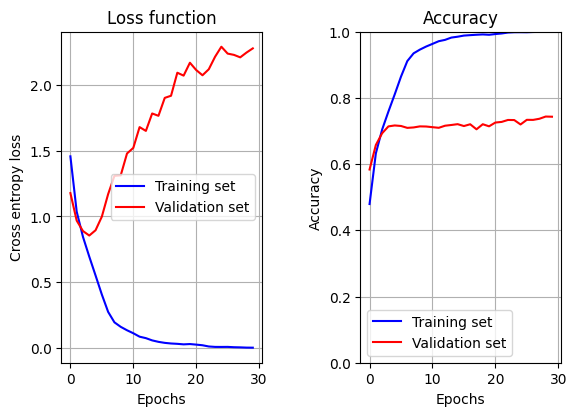

In [ ]:
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch
# elegimos usar gpu
use_gpu = True
if use_gpu:
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

# creamos una instancia del modelo
basic_cnn_model = OurCIFAR10Net()
# creamos la loss function
loss_fn = nn.CrossEntropyLoss()
# movemos todo lo que haga falta al dispositivo que hayamos elegido
basic_cnn_model = basic_cnn_model.to(device)
loss_fn = loss_fn.to(device)
# inicializamos un valor de learning rate
learning_rate = 1e-3
# creamos una instancia de un optimizador (por ejemplo, SGD),
# pasándole los parámetros de nuestro modelo y la learning rate que queremos usar
optimizer = optim.Adam(basic_cnn_model.parameters(), lr=learning_rate, weight_decay=1e-4)
# determinamos el número de épocas por el que queremos entrenar
n_epochs = 100

# entrenamos la red, indicando que es fully connected
basic_cnn_model, tr_loss, val_loss, tr_acc, val_acc = training_loop(n_epochs, optimizer, basic_cnn_model, loss_fn, cifar10_training, cifar10_validation, device, is_fully_connected=False)

# ploteamos los resultados
plot_training_statistics(tr_loss, val_loss, tr_acc, val_acc)

In [ ]:
torch.save(basic_cnn_model.state_dict(), 'modelo_cifar10.pth')

In [ ]:
torch.save({
    'epoch': n_epochs,
    'model_state': basic_cnn_model.state_dict(),
    'optimizer_state': optimizer.state_dict(),
}, 'checkpoint.pth')


In [ ]:
print(cifar10_training)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/gdrive/My Drive/Colab Notebooks/Computer Vision/Grupo 04
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=tensor([0.4914, 0.4822, 0.4465]), std=tensor([0.2470, 0.2435, 0.2616]))
           )


### 4. Evaluación sobre nuevos datos

A continuación les dejamos código que les permite abrir una serie de imágenes nuevas sobre las que podrían validar el algoritmo que implementaron.

Tienen que desarrollar las rutinas necesarias para:
* Convertir estas imágenes a tensores con los tamaños adecuados para poder procesarlos.
* Normalizarlos (utilizando las estadísticas que calculamos sobre los datos de entrenamiento).
* Iterar imagen por imagen y obtener su etiqueta utilizando la red neuronal convolucional entrenada.
* Calcular una o varias métricas de evaluación.
* Mostrar algunos ejemplos de resultados correctos o errados.

In [ ]:
import numpy as np
from os import path
import matplotlib.pyplot as plt

# accedemos a los datos
images = np.load(path.join(new_datasets_folder, 'cifar10.1_v4_data.npy'))
labels = np.load(path.join(new_datasets_folder, 'cifar10.1_v4_labels.npy'))
# los ponemos con los ejes en el lugar que queremos
images = np.transpose(images, axes=(0,3,1,2))
# imprimimos los tamaños
print(images.shape)
print(labels.shape)

# ACA ABAJO TIENEN QUE IMPLEMENTAR LA SOLUCIÓN

(2021, 3, 32, 32)
(2021,)
